In [1]:
library(data.table)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



# Without MHC

In [3]:
# load positive data from TBA
TBAdb <- fread('TBAdb/full/TBAdb-without-HLA.csv', data.table = F)
dim(TBAdb)

[1] 5933    2

In [4]:
TBAdb <- TBAdb[, c(2:1)]
colnames(TBAdb) <- c('CDR3b', 'epitope')
TBAdb$binder <- 1
TBAdb$dataset <- 'TBAdb'
TBAdb$order <- 1
head(TBAdb)

,CDR3b,epitope,binder,dataset,order
,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,ASSLEETQY,TAAQAAVVRFQEAAN,1,TBAdb,1
2,ASSPEETQY,TAAQAAVVRFQEAAN,1,TBAdb,1
3,ASSFEETQY,TAAQAAVVRFQEAAN,1,TBAdb,1
4,ASSVALASGANVLT,ADTLQSIGATTVASN,1,TBAdb,1
5,ASSVALATGEQY,ADTLQSIGATTVASN,1,TBAdb,1
6,ASSVALQGVHTQY,ADTLQSIGATTVASN,1,TBAdb,1


In [6]:
VDJdb <- fread('VDJdb/full/VDJdb-without-HLA.csv')
colnames(VDJdb) <- c('CDR3b', 'epitope')
VDJdb$binder <- 1
VDJdb$dataset <- 'VDJdb'
VDJdb$order <- 2
head(VDJdb)

CDR3b,epitope,binder,dataset,order
<chr>,<chr>,<dbl>,<chr>,<dbl>
ASSYLPGQGDHYSNQPQH,FLKEKGGL,1,VDJdb,2
ASSFEAGQGFFSNQPQH,FLKEKGGL,1,VDJdb,2
ASSFEPGQGFYSNQPQH,FLKEKGGL,1,VDJdb,2
ASSYEPGQVSHYSNQPQH,FLKEKGGL,1,VDJdb,2
ASSALASLNEQF,FLKEKGGL,1,VDJdb,2
ASSYLPGQGDHYSNQPQH,FLKEQGGL,1,VDJdb,2


In [7]:
McPAS <- fread('McPAS/full/McPAS-without-HLA.csv', data.table = F)
dim(McPAS)

[1] 10232     2

In [8]:
colnames(McPAS) <- c('CDR3b', 'epitope')
McPAS$binder <- 1
McPAS$dataset <- 'McPAS'
McPAS$order <- 3
head(McPAS)

,CDR3b,epitope,binder,dataset,order
,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,ASSLGNEQ,EAAGIGILTV,1,McPAS,3
2,ASSLGVATGEL,EAAGIGILTV,1,McPAS,3
3,ASSQEEGGGSWGNTIY,EAAGIGILTV,1,McPAS,3
4,ASSQEGLAGASQY,EAAGIGILTV,1,McPAS,3
5,ASSQETDIVFNOPQH,EAAGIGILTV,1,McPAS,3
6,ASSQGQLTDTQY,EAAGIGILTV,1,McPAS,3


In [9]:
IEDB <- fread('IEDB/full/IEDB-without-HLA.csv', data.table = F)
dim(IEDB)

[1] 145619      2

In [10]:
IEDB <- IEDB[, c(2:1)]
colnames(IEDB) <- c('CDR3b', 'epitope')
IEDB$binder <- 1
IEDB$dataset <- 'IEDB'
IEDB$order <- 4
head(IEDB)

,CDR3b,epitope,binder,dataset,order
,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,ASSQDRDTQY,VMAPRTLIL,1,IEDB,4
2,ASSLGQAYEQY,FLRGRAYGL,1,IEDB,4
3,ASSLGQAYEQY,FLRGRFYGL,1,IEDB,4
4,ASSLGQAYEQY,EEYLQAFTY,1,IEDB,4
5,ASSLGQAYEQY,EEYLKAWTF,1,IEDB,4
6,ASSYPGGGFYEQY,LLFGYPVYV,1,IEDB,4


In [11]:
X10.pos <- fread('10X/full/10X-pos-without-HLA.csv', data.table = F)
dim(X10.pos)

[1] 12649     2

In [12]:
colnames(X10.pos) <- c('CDR3b', 'epitope')
X10.pos$binder <- 1
X10.pos$dataset <- '10X'
X10.pos$order <- 5
head(X10.pos)

,CDR3b,epitope,binder,dataset,order
,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,AAAETGSAGELF,KLGGALQAK,1,10X,5
2,AAGEMFGLGETQY,AVFDRKSDAK,1,10X,5
3,AAGGASYNEQF,KLGGALQAK,1,10X,5
4,AAGGGSEMNTEAF,KLGGALQAK,1,10X,5
5,AAGLASNEQF,KLGGALQAK,1,10X,5
6,AAGSSGNQPQH,RAKFKQLL,1,10X,5


In [13]:
X10.neg <- fread('10X/full/10X-neg-without-HLA.csv', data.table = F)
colnames(X10.neg) <- c('CDR3b', 'epitope')
X10.neg$binder <- 0
X10.neg$dataset <- '10X'
X10.neg$order <- 6
head(X10.neg)

,CDR3b,epitope,binder,dataset,order
,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,AAAETGSAGELF,SLEGGGLGY,0,10X,6
2,AAAETGSAGELF,STEGGGLAY,0,10X,6
3,AAAETGSAGELF,VTEHDTLLY,0,10X,6
4,AAAETGSAGELF,ALIAPVHAV,0,10X,6
5,AAAETGSAGELF,CLGGLLTMV,0,10X,6
6,AAAETGSAGELF,CLLGTYTQDV,0,10X,6


In [14]:
pos <- merge(merge(TBAdb, merge(VDJdb, McPAS, all = T), all = T), merge(IEDB, X10.pos, all = T), all = T)
pos <- pos[order(pos$order),]
dim(pos)

[1] 213672      5

In [15]:
pos <- pos[!duplicated(pos[, !colnames(pos) %in% c('dataset', 'order')]),] # remove dups across positive sets
dim(pos)

[1] 161993      5

In [16]:
table(pos$dataset)


   10X   IEDB  McPAS  TBAdb  VDJdb 
   337 115263   6636   5933  33824 

In [17]:
# combine pos and neg
dat <- merge(pos, X10.neg, all = T)
dat <- dat[order(dat$order),]
dat$order <- NULL
dim(dat)

[1] 3322348       4

In [18]:
# remove conflict labels
dat <- dat %>%
     group_by(CDR3b, epitope) %>% 
     filter(n_distinct(binder) == 1) %>%
     ungroup
dim(dat)

[1] 3316962       4

In [19]:
table(dat$binder)
table(dat$binder, dat$dataset)


      0       1 
3157662  159300 

   
        10X    IEDB   McPAS   TBAdb   VDJdb
  0 3157662       0       0       0       0
  1     337  114985    6590    5744   31644

In [22]:
dat$CDR3b[grepl('[a-z]', dat$CDR3b)]
dat$epitope[grepl('[a-z]', dat$epitope)]

character(0)

character(0)

In [23]:
summarize <- dat %>% group_by(binder) %>% summarise(n = n())
summarize$binder <- as.factor(summarize$binder)
head(summarize)

binder,n
<fct>,<int>
0,3157662
1,159300


In [24]:
library(ggplot2)
library(cowplot)
library(ggrepel)

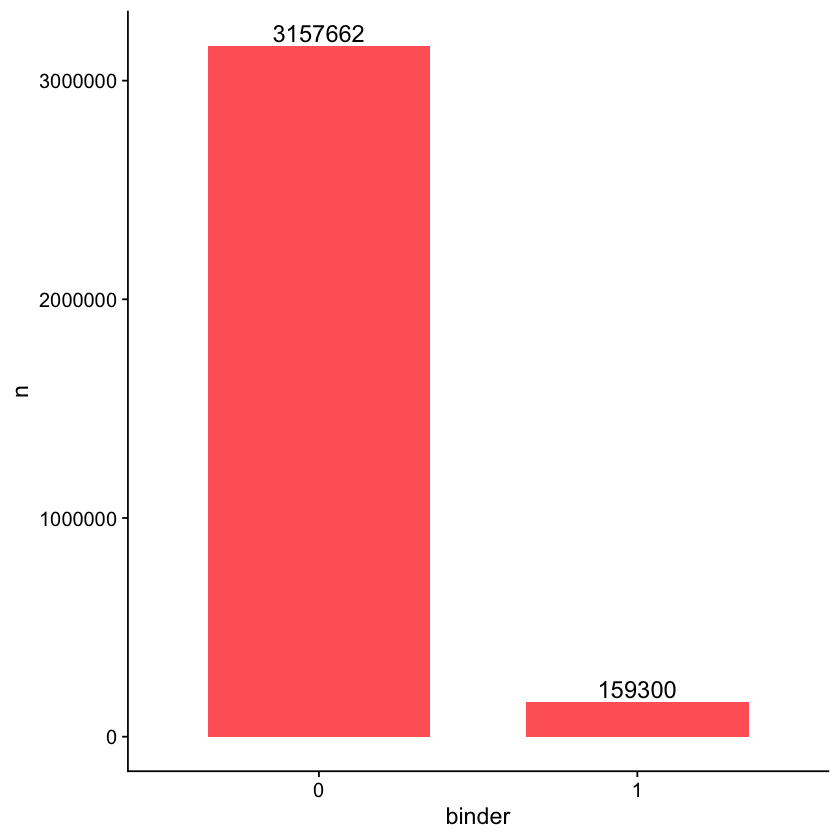

In [25]:
options(scipen=999)
ggplot(summarize, aes(y=n, x=binder)) + 
  geom_bar(stat='identity', fill = "#FF6666", width = 0.7) + geom_text(aes(label=n), size = 5, vjust=-0.25) + theme_cowplot()

In [26]:
pos <- dat[dat$binder == 1,]
pos.sum <- pos %>% group_by(dataset) %>% summarise(n = n())

In [27]:
pos.sum <- pos.sum %>% 
  mutate(
    cs = rev(cumsum(rev(n))), 
    pos = n/2 + lead(cs, 1),
    pos = if_else(is.na(pos), n/2, pos))

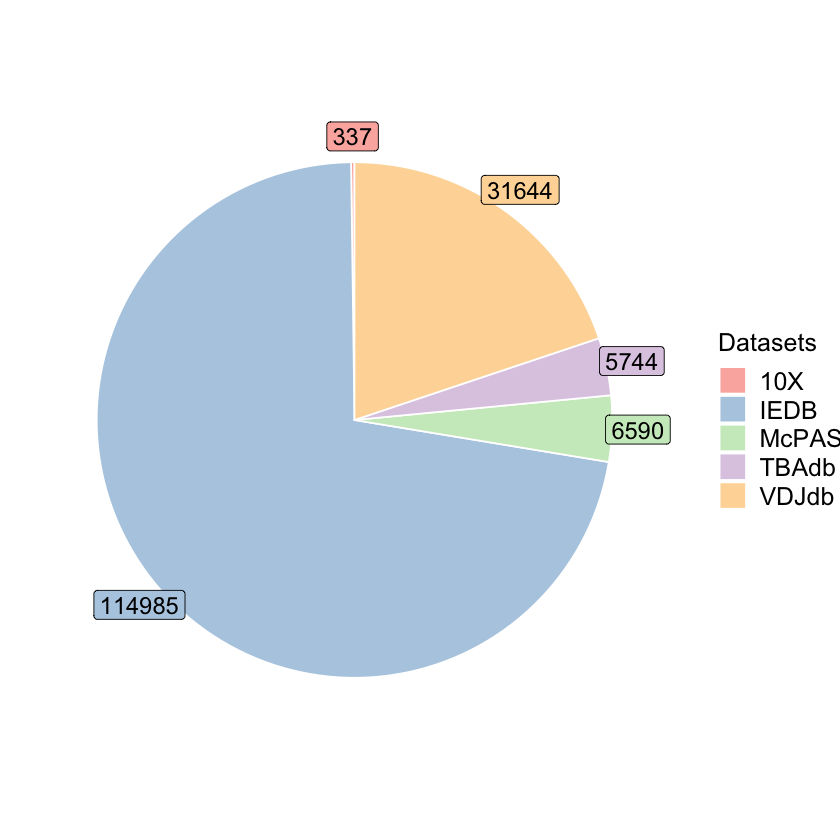

In [28]:
ggplot(pos.sum, aes(x="", y=n, fill=dataset)) +
  geom_bar(stat = 'identity', width=1, color="white") +
  coord_polar("y") + scale_fill_brewer(palette = "Pastel1") +
  geom_label(aes(y = pos, label = paste0(n)), #hjust = 0,
             size = 5, nudge_x = 0.6, show.legend = FALSE) +
guides(fill = guide_legend(title = "Datasets", label.theme = element_text(
      size = 15), title.theme = element_text(size = 15))) + theme_void()

In [29]:
dat$dataset <- NULL

In [30]:
write.table(dat, 'final-without-HLA.csv', quote = F, append = F, row.names = F, sep = ',')

# With MHC

In [31]:
# load positive data from TBA
TBAdb <- fread('TBAdb/full/TBAdb-analyzed.csv', data.table = F)
dim(TBAdb)

[1] 5941    3

In [32]:
colnames(TBAdb) <- c('CDR3b', 'MHC', 'epitope')
TBAdb$binder <- 1
TBAdb$dataset <- 'TBAdb'
TBAdb$order <- 1
head(TBAdb)

,CDR3b,MHC,epitope,binder,dataset,order
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,ASSLEETQY,HLA-DRB1*15:03,TAAQAAVVRFQEAAN,1,TBAdb,1
2,ASSPEETQY,HLA-DRB1*15:03,TAAQAAVVRFQEAAN,1,TBAdb,1
3,ASSFEETQY,HLA-DRB1*15:03,TAAQAAVVRFQEAAN,1,TBAdb,1
4,ASSVALASGANVLT,HLA-DRB1*15:03,ADTLQSIGATTVASN,1,TBAdb,1
5,ASSVALATGEQY,HLA-DRB1*15:03,ADTLQSIGATTVASN,1,TBAdb,1
6,ASSVALQGVHTQY,HLA-DRB1*15:03,ADTLQSIGATTVASN,1,TBAdb,1


In [33]:
VDJdb <- fread('VDJdb/full/VDJdb-analyzed.csv')
head(VDJdb)

CDR3,MHC A,Epitope
<chr>,<chr>,<chr>
ASSYLPGQGDHYSNQPQH,HLA-B*08,FLKEKGGL
ASSFEAGQGFFSNQPQH,HLA-B*08,FLKEKGGL
ASSFEPGQGFYSNQPQH,HLA-B*08,FLKEKGGL
ASSYEPGQVSHYSNQPQH,HLA-B*08,FLKEKGGL
ASSALASLNEQF,HLA-B*08,FLKEKGGL
ASSYLPGQGDHYSNQPQH,HLA-B*08,FLKEQGGL


In [34]:
colnames(VDJdb) <- c('CDR3b', 'MHC', 'epitope')
VDJdb$binder <- 1
VDJdb$dataset <- 'VDJdb'
VDJdb$order <- 2
head(VDJdb)

CDR3b,MHC,epitope,binder,dataset,order
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
ASSYLPGQGDHYSNQPQH,HLA-B*08,FLKEKGGL,1,VDJdb,2
ASSFEAGQGFFSNQPQH,HLA-B*08,FLKEKGGL,1,VDJdb,2
ASSFEPGQGFYSNQPQH,HLA-B*08,FLKEKGGL,1,VDJdb,2
ASSYEPGQVSHYSNQPQH,HLA-B*08,FLKEKGGL,1,VDJdb,2
ASSALASLNEQF,HLA-B*08,FLKEKGGL,1,VDJdb,2
ASSYLPGQGDHYSNQPQH,HLA-B*08,FLKEQGGL,1,VDJdb,2


In [35]:
McPAS <- fread('McPAS/full/McPAS-analyzed.csv', data.table = F)
head(McPAS)

,CDR3.beta.aa,MHC,Epitope.peptide
,<chr>,<chr>,<chr>
1,ASSLGNEQ,HLA-A*02,EAAGIGILTV
2,ASSLGVATGEL,HLA-A*02,EAAGIGILTV
3,ASSQEEGGGSWGNTIY,HLA-A*02,EAAGIGILTV
4,ASSQEGLAGASQY,HLA-A*02,EAAGIGILTV
5,ASSQETDIVFNOPQH,HLA-A*02,EAAGIGILTV
6,ASSQGQLTDTQY,HLA-A*02,EAAGIGILTV


In [36]:
colnames(McPAS) <- c('CDR3b', 'MHC', 'epitope')
McPAS$binder <- 1
McPAS$dataset <- 'McPAS'
McPAS$order <- 3
head(McPAS)

,CDR3b,MHC,epitope,binder,dataset,order
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,ASSLGNEQ,HLA-A*02,EAAGIGILTV,1,McPAS,3
2,ASSLGVATGEL,HLA-A*02,EAAGIGILTV,1,McPAS,3
3,ASSQEEGGGSWGNTIY,HLA-A*02,EAAGIGILTV,1,McPAS,3
4,ASSQEGLAGASQY,HLA-A*02,EAAGIGILTV,1,McPAS,3
5,ASSQETDIVFNOPQH,HLA-A*02,EAAGIGILTV,1,McPAS,3
6,ASSQGQLTDTQY,HLA-A*02,EAAGIGILTV,1,McPAS,3


In [37]:
IEDB <- fread('IEDB/full/IEDB-analyzed.csv', data.table = F)
head(IEDB)

,Description,MHC Allele Names,CDR3b
,<chr>,<chr>,<chr>
1,VMAPRTLIL,HLA-E*01:03,ASSQDRDTQY
2,FLRGRAYGL,HLA-B*08,ASSLGQAYEQY
3,FLRGRFYGL,HLA-B*08,ASSLGQAYEQY
4,EEYLQAFTY,HLA-B*44:05,ASSLGQAYEQY
5,FLRGRAYGL,HLA-B*08:01,ASSLGQAYEQY
6,EEYLKAWTF,HLA-B*44:05,ASSLGQAYEQY


In [38]:
IEDB <- IEDB[, c(3:1)]
colnames(IEDB) <- c('CDR3b', 'MHC', 'epitope')
IEDB$binder <- 1
IEDB$dataset <- 'IEDB'
IEDB$order <- 4
head(IEDB)

,CDR3b,MHC,epitope,binder,dataset,order
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,ASSQDRDTQY,HLA-E*01:03,VMAPRTLIL,1,IEDB,4
2,ASSLGQAYEQY,HLA-B*08,FLRGRAYGL,1,IEDB,4
3,ASSLGQAYEQY,HLA-B*08,FLRGRFYGL,1,IEDB,4
4,ASSLGQAYEQY,HLA-B*44:05,EEYLQAFTY,1,IEDB,4
5,ASSLGQAYEQY,HLA-B*08:01,FLRGRAYGL,1,IEDB,4
6,ASSLGQAYEQY,HLA-B*44:05,EEYLKAWTF,1,IEDB,4


In [39]:
X10.pos <- fread('10X/full/10X-pos-analyzed.csv', data.table = F)
head(X10.pos)

,cell_clono_cdr3_aa,HLA,Epitope
,<chr>,<chr>,<chr>
1,AAAETGSAGELF,HLA-A*03:01,KLGGALQAK
2,AAGEMFGLGETQY,HLA-A*11:01,AVFDRKSDAK
3,AAGGASYNEQF,HLA-A*03:01,KLGGALQAK
4,AAGGGSEMNTEAF,HLA-A*03:01,KLGGALQAK
5,AAGLASNEQF,HLA-A*03:01,KLGGALQAK
6,AAGSSGNQPQH,HLA-B*08:01,RAKFKQLL


In [40]:
colnames(X10.pos) <- c('CDR3b', 'MHC', 'epitope')
X10.pos$binder <- 1
X10.pos$dataset <- '10X'
X10.pos$order <- 5
head(X10.pos)

,CDR3b,MHC,epitope,binder,dataset,order
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,AAAETGSAGELF,HLA-A*03:01,KLGGALQAK,1,10X,5
2,AAGEMFGLGETQY,HLA-A*11:01,AVFDRKSDAK,1,10X,5
3,AAGGASYNEQF,HLA-A*03:01,KLGGALQAK,1,10X,5
4,AAGGGSEMNTEAF,HLA-A*03:01,KLGGALQAK,1,10X,5
5,AAGLASNEQF,HLA-A*03:01,KLGGALQAK,1,10X,5
6,AAGSSGNQPQH,HLA-B*08:01,RAKFKQLL,1,10X,5


In [41]:
X10.neg <- fread('10X/full/10X-neg-analyzed.csv', data.table = F)
colnames(X10.neg) <- c('CDR3b', 'MHC', 'epitope')
X10.neg$binder <- 0
X10.neg$dataset <- '10X'
X10.neg$order <- 6
head(X10.neg)

,CDR3b,MHC,epitope,binder,dataset,order
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,AAAETGSAGELF,HLA-A*01:01,SLEGGGLGY,0,10X,6
2,AAAETGSAGELF,HLA-A*01:01,STEGGGLAY,0,10X,6
3,AAAETGSAGELF,HLA-A*01:01,VTEHDTLLY,0,10X,6
4,AAAETGSAGELF,HLA-A*02:01,ALIAPVHAV,0,10X,6
5,AAAETGSAGELF,HLA-A*02:01,CLGGLLTMV,0,10X,6
6,AAAETGSAGELF,HLA-A*02:01,CLLGTYTQDV,0,10X,6


In [42]:
dim(TBAdb)
dim(VDJdb)
dim(McPAS)
dim(IEDB)
dim(X10.pos)
dim(X10.neg)

[1] 5941    6

[1] 39634     6

[1] 10335     6

[1] 58553     6

[1] 12649     6

[1] 3160355       6

In [43]:
pos <- merge(merge(TBAdb, merge(VDJdb, McPAS, all = T), all = T), merge(IEDB, X10.pos, all = T), all = T)
pos <- pos[order(pos$order),]
dim(pos)

[1] 127112      6

In [44]:
head(pos)

,CDR3b,MHC,epitope,binder,dataset,order
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
3,AAADEEIGNQPQH,HLA-A*01:01,ATDALMTGY,1,TBAdb,1
23,AAGAGLSYEQY,HLA-A*02,NLVPMVATV,1,TBAdb,1
47,AAGGQFYGYT,HLA-B*57:01,KAFSPEVIPMF,1,TBAdb,1
79,AALAVDTQY,HLA-A*02,NLVPMVATV,1,TBAdb,1
135,AASREGPNQPQH,HLA-A*02:01,NLVPMVATV,1,TBAdb,1
140,AASSYGQNFV,HLA-B*08,QIKVRVDMV,1,TBAdb,1


In [45]:
MHC_alias <- readxl::read_excel('HLA.xlsx', sheet = 'HLA-synonyms')
head(MHC_alias)

Original,HLA,Ref
<chr>,<chr>,<chr>
HLA-A*01:01,HLA-A*01:01,NA
HLA-A*02,HLA-A*02:01,NA
HLA-B*57:01,HLA-B*57:01,NA
HLA-A*02:01,HLA-A*02:01,NA
HLA-B*08,HLA-B*08:01,NA
HLA-B*57,HLA-B*57:01,NA


In [46]:
pos$HLA <- plyr::mapvalues(pos$MHC, from = MHC_alias$Original, to = MHC_alias$HLA)
head(pos)

,CDR3b,MHC,epitope,binder,dataset,order,HLA
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
3,AAADEEIGNQPQH,HLA-A*01:01,ATDALMTGY,1,TBAdb,1,HLA-A*01:01
23,AAGAGLSYEQY,HLA-A*02,NLVPMVATV,1,TBAdb,1,HLA-A*02:01
47,AAGGQFYGYT,HLA-B*57:01,KAFSPEVIPMF,1,TBAdb,1,HLA-B*57:01
79,AALAVDTQY,HLA-A*02,NLVPMVATV,1,TBAdb,1,HLA-A*02:01
135,AASREGPNQPQH,HLA-A*02:01,NLVPMVATV,1,TBAdb,1,HLA-A*02:01
140,AASSYGQNFV,HLA-B*08,QIKVRVDMV,1,TBAdb,1,HLA-B*08:01


In [47]:
X10.neg$HLA <- plyr::mapvalues(X10.neg$MHC, from = MHC_alias$Original, to = MHC_alias$HLA, warn_missing = FALSE)
head(X10.neg)

,CDR3b,MHC,epitope,binder,dataset,order,HLA
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,AAAETGSAGELF,HLA-A*01:01,SLEGGGLGY,0,10X,6,HLA-A*01:01
2,AAAETGSAGELF,HLA-A*01:01,STEGGGLAY,0,10X,6,HLA-A*01:01
3,AAAETGSAGELF,HLA-A*01:01,VTEHDTLLY,0,10X,6,HLA-A*01:01
4,AAAETGSAGELF,HLA-A*02:01,ALIAPVHAV,0,10X,6,HLA-A*02:01
5,AAAETGSAGELF,HLA-A*02:01,CLGGLLTMV,0,10X,6,HLA-A*02:01
6,AAAETGSAGELF,HLA-A*02:01,CLLGTYTQDV,0,10X,6,HLA-A*02:01


In [48]:
# combine pos and neg
dat <- merge(pos, X10.neg, all = T)
dat <- dat[order(dat$order),]
dat$order <- NULL
dim(dat)

[1] 3287467       6

In [49]:
# remove conflict labels
dat <- dat %>%
     group_by(CDR3b, epitope, HLA) %>% 
     filter(n_distinct(binder) == 1) %>%
     ungroup
dim(dat)

[1] 3281008       6

In [50]:
HLA_seq <- readxl::read_excel('HLA.xlsx', sheet = 'HLA-seq')
head(HLA_seq)

HLA,IMGT,Length,Link
<chr>,<chr>,<dbl>,<chr>
HLA-A*01:01,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKMEPRAPWIEQEGPEYWDQETRNMKAHSQTDRANLGTLRGYYNQSEDGSHTIQIMYGCDVGPDGRFLRGYRQDAYDGKDYIALNEDLRSWTAADMAAQITKRKWEAVHAAEQRRVYLEGRCVDGLRRYLENGKETLQRTDPPKTHMTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWELSSQPTIPIVGIIAGLVLLGAVITGAVVAAVMWRRKSSDRKGGSYTQAASSDSAQGSDVSLTACKV,365,https://www.ebi.ac.uk/ipd/imgt/hla/alleles/allele/?accession=HLA00001
HLA-A*02:01,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV,365,https://www.ebi.ac.uk/ipd/imgt/hla/alleles/allele/?accession=HLA00005
HLA-B*57:01,MRVTAPRTVLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRMAPRAPWIEQEGPEYWDGETRNMKASAQTYRENLRIALRYYNQSEAGSHIIQVMYGCDVGPDGRLLRGHDQSAYDGKDYIALNEDLSSWTAADTAAQITQRKWEAARVAEQLRAYLEGLCVEWLRRYLENGKETLQRADPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWEPSSQSTVPIVGIVAGLAVLAVVVIGAVVAAVMCRRKSSGGKGGSYSQAACSDSAQGSDVSLTA,362,https://www.ebi.ac.uk/ipd/imgt/hla/alleles/allele/?accession=HLA00381
HLA-B*08:01,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFDTAMSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEPRAPWIEQEGPEYWDRNTQIFKTNTQTDRESLRNLRGYYNQSEAGSHTLQSMYGCDVGPDGRLLRGHNQYAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAARVAEQDRAYLEGTCVEWLRRYLENGKDTLERADPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWEPSSQSTVPIVGIVAGLAVLAVVVIGAVVAAVMCRRKSSGGKGGSYSQAACSDSAQGSDVSLTA,362,https://www.ebi.ac.uk/ipd/imgt/hla/alleles/allele/?accession=HLA00146
HLA-B*42:01,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEPRAPWIEQEGPEYWDRNTQIYKAQAQTDRESLRNLRGYYNQSEAGSHTLQSMYGCDVGPDGRLLRGHNQYAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAARVAEQDRAYLEGTCVEWLRRYLENGKDTLERADPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWEPSSQSTVPIVGIVAGLAVLAVVVIGAVVAAVMCRRKSSGGKGGSYSQAACSDSAQGSDVSLTA,362,https://www.ebi.ac.uk/ipd/imgt/hla/alleles/allele/?accession=HLA00315
HLA-B*57:03,MRVTAPRTVLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRMAPRAPWIEQEGPEYWDGETRNMKASAQTYRENLRIALRYYNQSEAGSHIIQVMYGCDVGPDGRLLRGHNQYAYDGKDYIALNEDLSSWTAADTAAQITQRKWEAARVAEQLRAYLEGLCVEWLRRYLENGKETLQRADPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWEPSSQSTVPIVGIVAGLAVLAVVVIGAVVAAVMCRRKSSGGKGGSYSQAACSDSAQGSDVSLTA,362,https://www.ebi.ac.uk/ipd/imgt/hla/alleles/allele/?accession=HLA00383


In [61]:
# check length of sequence is of the reported length
check <- unlist(lapply(1:nrow(HLA_seq), function(i) {nchar(HLA_seq$IMGT[i]) == HLA_seq$Length[i]}))
check <- check[!is.na(check)]
all(check)

[1] TRUE

In [62]:
dat$MHC <- plyr::mapvalues(dat$HLA, from = HLA_seq$HLA, to = HLA_seq$IMGT)
head(dat)

CDR3b,MHC,epitope,binder,dataset,HLA
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
AAADEEIGNQPQH,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKMEPRAPWIEQEGPEYWDQETRNMKAHSQTDRANLGTLRGYYNQSEDGSHTIQIMYGCDVGPDGRFLRGYRQDAYDGKDYIALNEDLRSWTAADMAAQITKRKWEAVHAAEQRRVYLEGRCVDGLRRYLENGKETLQRTDPPKTHMTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWELSSQPTIPIVGIIAGLVLLGAVITGAVVAAVMWRRKSSDRKGGSYTQAASSDSAQGSDVSLTACKV,ATDALMTGY,1,TBAdb,HLA-A*01:01
AAGAGLSYEQY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV,NLVPMVATV,1,TBAdb,HLA-A*02:01
AAGGQFYGYT,MRVTAPRTVLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRMAPRAPWIEQEGPEYWDGETRNMKASAQTYRENLRIALRYYNQSEAGSHIIQVMYGCDVGPDGRLLRGHDQSAYDGKDYIALNEDLSSWTAADTAAQITQRKWEAARVAEQLRAYLEGLCVEWLRRYLENGKETLQRADPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWEPSSQSTVPIVGIVAGLAVLAVVVIGAVVAAVMCRRKSSGGKGGSYSQAACSDSAQGSDVSLTA,KAFSPEVIPMF,1,TBAdb,HLA-B*57:01
AALAVDTQY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV,NLVPMVATV,1,TBAdb,HLA-A*02:01
AASREGPNQPQH,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV,NLVPMVATV,1,TBAdb,HLA-A*02:01
AASSYGQNFV,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFDTAMSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEPRAPWIEQEGPEYWDRNTQIFKTNTQTDRESLRNLRGYYNQSEAGSHTLQSMYGCDVGPDGRLLRGHNQYAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAARVAEQDRAYLEGTCVEWLRRYLENGKDTLERADPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWEPSSQSTVPIVGIVAGLAVLAVVVIGAVVAAVMCRRKSSGGKGGSYSQAACSDSAQGSDVSLTA,QIKVRVDMV,1,TBAdb,HLA-B*08:01


In [63]:
dat <- dat[!is.na(dat$MHC),]
dim(dat) # decrease 6660 obs, in which around 5000 obs were from positive set

[1] 3274348       6

In [64]:
table(dat$binder)
table(dat$binder, dat$dataset)


      0       1 
3157664  116684 

   
        10X    IEDB   McPAS   TBAdb   VDJdb
  0 3157664       0       0       0       0
  1   12649   55455    6444    5647   36489

In [65]:
6660/116684

[1] 0.05707723

In [66]:
summarize <- dat %>% group_by(binder) %>% summarise(n = n())
summarize$binder <- as.factor(summarize$binder)
head(summarize)

binder,n
<fct>,<int>
0,3157664
1,116684


In [67]:
library(ggplot2)
library(cowplot)
library(ggrepel)

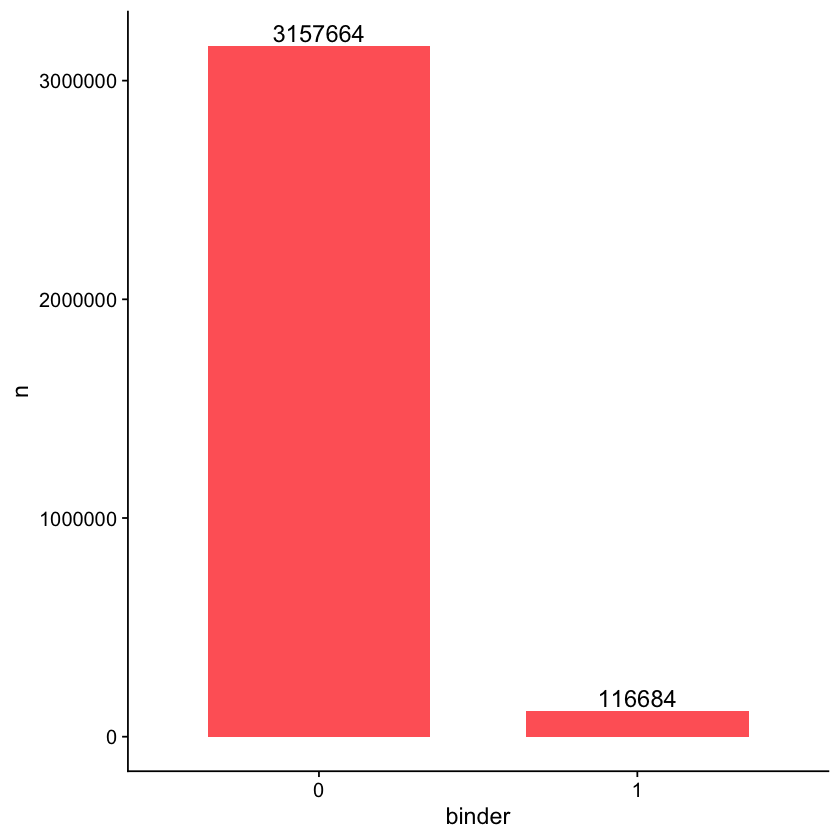

In [68]:
options(scipen=999)
ggplot(summarize, aes(y=n, x=binder)) + 
  geom_bar(stat='identity', fill = "#FF6666", width = 0.7) + geom_text(aes(label=n), size = 5, vjust=-0.25) + theme_cowplot()

In [69]:
pos <- dat[dat$binder == 1,]
pos.sum <- pos %>% group_by(dataset) %>% summarise(n = n())

In [70]:
pos.sum <- pos.sum %>% 
  mutate(
    cs = rev(cumsum(rev(n))), 
    pos = n/2 + lead(cs, 1),
    pos = if_else(is.na(pos), n/2, pos))

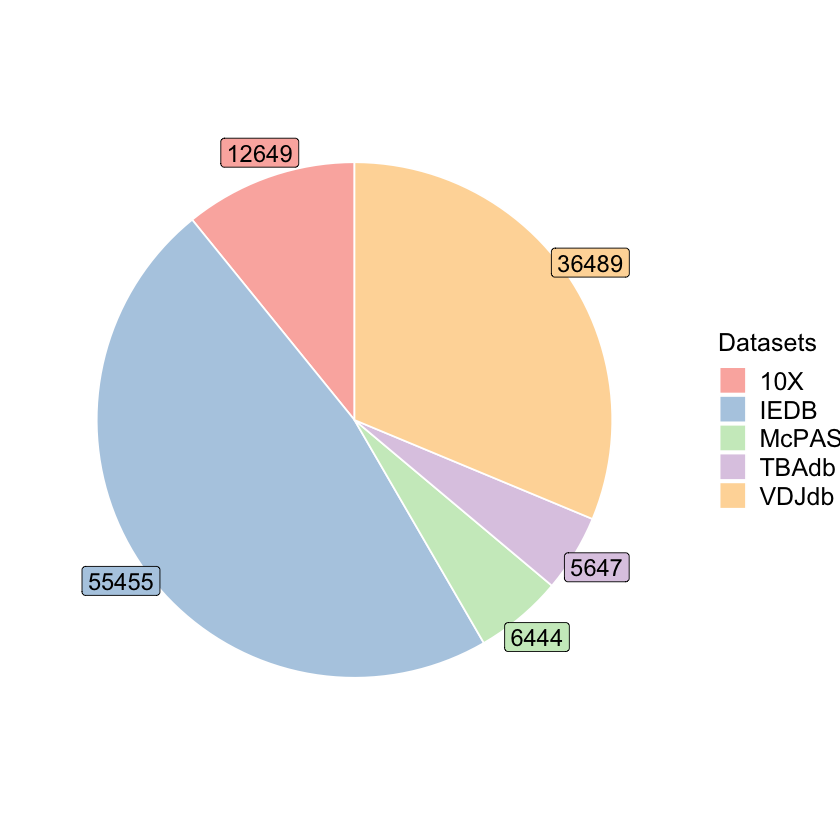

In [71]:
ggplot(pos.sum, aes(x="", y=n, fill=dataset)) +
  geom_bar(stat = 'identity', width=1, color="white") +
  coord_polar("y") + scale_fill_brewer(palette = "Pastel1") +
  geom_label(aes(y = pos, label = paste0(n)), #hjust = 0,
             size = 5, nudge_x = 0.6, show.legend = FALSE) +
guides(fill = guide_legend(title = "Datasets", label.theme = element_text(
      size = 15), title.theme = element_text(size = 15))) + theme_void()

In [72]:
head(dat)

CDR3b,MHC,epitope,binder,dataset,HLA
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
AAADEEIGNQPQH,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKMEPRAPWIEQEGPEYWDQETRNMKAHSQTDRANLGTLRGYYNQSEDGSHTIQIMYGCDVGPDGRFLRGYRQDAYDGKDYIALNEDLRSWTAADMAAQITKRKWEAVHAAEQRRVYLEGRCVDGLRRYLENGKETLQRTDPPKTHMTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWELSSQPTIPIVGIIAGLVLLGAVITGAVVAAVMWRRKSSDRKGGSYTQAASSDSAQGSDVSLTACKV,ATDALMTGY,1,TBAdb,HLA-A*01:01
AAGAGLSYEQY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV,NLVPMVATV,1,TBAdb,HLA-A*02:01
AAGGQFYGYT,MRVTAPRTVLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRMAPRAPWIEQEGPEYWDGETRNMKASAQTYRENLRIALRYYNQSEAGSHIIQVMYGCDVGPDGRLLRGHDQSAYDGKDYIALNEDLSSWTAADTAAQITQRKWEAARVAEQLRAYLEGLCVEWLRRYLENGKETLQRADPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWEPSSQSTVPIVGIVAGLAVLAVVVIGAVVAAVMCRRKSSGGKGGSYSQAACSDSAQGSDVSLTA,KAFSPEVIPMF,1,TBAdb,HLA-B*57:01
AALAVDTQY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV,NLVPMVATV,1,TBAdb,HLA-A*02:01
AASREGPNQPQH,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV,NLVPMVATV,1,TBAdb,HLA-A*02:01
AASSYGQNFV,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFDTAMSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEPRAPWIEQEGPEYWDRNTQIFKTNTQTDRESLRNLRGYYNQSEAGSHTLQSMYGCDVGPDGRLLRGHNQYAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAARVAEQDRAYLEGTCVEWLRRYLENGKDTLERADPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWEPSSQSTVPIVGIVAGLAVLAVVVIGAVVAAVMCRRKSSGGKGGSYSQAACSDSAQGSDVSLTA,QIKVRVDMV,1,TBAdb,HLA-B*08:01


In [73]:
dat$MHC[grepl('[a-z]', dat$MHC)]
dat$epitope[grepl('[a-z]', dat$epitope)]
dat$CDR3b[grepl('[a-z]', dat$CDR3b)]

character(0)

character(0)

character(0)

In [74]:
dat$dataset <- dat$HLA <- NULL

In [75]:
write.table(dat, 'final-with-HLA.csv', quote = F, append = F, row.names = F, sep = ',')